In [2]:
import networkx as nx
import numpy as np

In [3]:
g = nx.Graph()

In [6]:
g.add_nodes_from(list(range(100)))

In [8]:
g.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99))

In [27]:
x = nx.connected_components(g)
for xx in x:
    print(len(xx), end = '')

1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111

In [26]:
class plotData:
    def __init__(self):
        self.n_comp = 0
        self.sizes = []
        self.avg_deg = []

In [52]:
data = []
g = nx.Graph()
g.add_nodes_from(list(range(100)))

In [14]:
import random

In [53]:
while not nx.is_connected(g):
    components = nx.connected_components(g)
    data.append(plotData())
    for component in components:
        data[-1].n_comp += 1
        data[-1].sizes.append(len(component))
        avg = 0
        for node in component:
            avg += g.degree[node]
        avg /= data[-1].sizes[-1]
        data[-1].avg_deg.append(avg)
    edge = random.choices(list(g.nodes()), k=2)
    g.add_edge(edge[0], edge[1])

components = nx.connected_components(g)
data.append(plotData())
for component in components:
    data[-1].n_comp += 1
    data[-1].sizes.append(len(component))
    avg = 0
    for node in component:
        avg += g.degree[node]
    avg /= data[-1].sizes[-1]
    data[-1].avg_deg.append(avg)

In [69]:
from matplotlib import pyplot as plt
from matplotlib.widgets import Slider

In [88]:
len(data)
%matplotlib widget
%matplotlib

Using matplotlib backend: module://ipympl.backend_nbagg


In [89]:
x = data[100].sizes
y = data[100].avg_deg
plt.ion()
fig, ax = plt.subplots()
p = plt.scatter(x, y)
axcolor = 'lightgoldenrodyellow'
ax = plt.axes([0.25, -1, 0.65, 0.03], facecolor=axcolor)
slide = Slider(ax, 'Step', 0, len(data)-1, valinit=0, valstep=1)
def update(val):
    val = int(val)
    p.set_offsets(np.c_[data[val].sizes, data[val].avg_deg])
    fig.canvas.draw_idle()

slide.on_changed(update)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

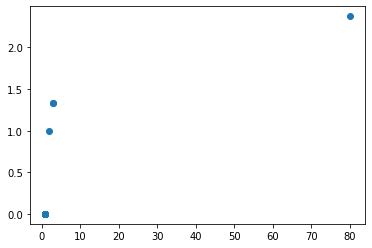